Dataset source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Context

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

### Source

Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

### Data

In the dataframe we can find the 96 columns - 1 targe column and 95 factors and 6819 rows:

| Column | Description |
| ------ | ----------- |
| Y | Bankrupt?: Class label |
| X1 | ROA(C) before interest and depreciation before interest: Return On Total Assets(C)|
| X2 | ROA(A) before interest and % after tax: Return On Total Assets(A)
| X3 | ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
| X4 | Operating Gross Margin: Gross Profit/Net Sales
| X5 | Realized Sales Gross Margin: Realized Gross Profit/Net Sales
| X6 | Operating Profit Rate: Operating Income/Net Sales
| X7 | Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
| X8 | After-tax net Interest Rate: Net Income/Net Sales
| X9 | Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
| X10 | Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
| X11 | Operating Expense Rate: Operating Expenses/Net Sales
| X12 | Research and development expense rate: (Research and Development Expenses)/Net Sales
| X13 | Cash flow rate: Cash Flow from Operating/Current Liabilities
| X14 | Interest-bearing debt interest rate: Interest-bearing Debt/Equity
| X15 | Tax rate (A): Effective Tax Rate
| X16 | Net Value Per Share (B): Book Value Per Share(B)
| X17 | Net Value Per Share (A): Book Value Per Share(A)
| X18 | Net Value Per Share (C): Book Value Per Share(C)
| X19 | Persistent EPS in the Last Four Seasons: EPS-Net Income
| X20 | Cash Flow Per Share
| X21 | Revenue Per Share (Yuan ¥): Sales Per Share
| X22 | Operating Profit Per Share (Yuan ¥): Operating Income Per Share
| X23 | Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
| X24 | Realized Sales Gross Profit Growth Rate
| X25 | Operating Profit Growth Rate: Operating Income Growth
| X26 | After-tax Net Profit Growth Rate: Net Income Growth
| X27 | Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
| X28 | Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
| X29 | Total Asset Growth Rate: Total Asset Growth
| X30 | Net Value Growth Rate: Total Equity Growth
| X31 | Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
| X32 | Cash Reinvestment %: Cash Reinvestment Ratio
| X33 | Current Ratio
| X34 | Quick Ratio: Acid Test
| X35 | Interest Expense Ratio: Interest Expenses/Total Revenue
| X36 | Total debt/Total net worth: Total Liability/Equity Ratio
| X37 | Debt ratio %: Liability/Total Assets
| X38 | Net worth/Assets: Equity/Total Assets
| X39 | Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
| X40 | Borrowing dependency: Cost of Interest-bearing Debt
| X41 | Contingent liabilities/Net worth: Contingent Liability/Equity
| X42 | Operating profit/Paid-in capital: Operating Income/Capital
| X43 | Net profit before tax/Paid-in capital: Pretax Income/Capital
| X44 | Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
| X45 | Total Asset Turnover
| X46 | Accounts Receivable Turnover
| X47 | Average Collection Days: Days Receivable Outstanding
| X48 | Inventory Turnover Rate (times)
| X49 | Fixed Assets Turnover Frequency
| X50 | Net Worth Turnover Rate (times): Equity Turnover
| X51 | Revenue per person: Sales Per Employee
| X52 | Operating profit per person: Operation Income Per Employee
| X53 | Allocation rate per person: Fixed Assets Per Employee
| X54 | Working Capital to Total Assets
| X55 | Quick Assets/Total Assets
| X56 | Current Assets/Total Assets
| X57 | Cash/Total Assets
| X58 | Quick Assets/Current Liability
| X59 | Cash/Current Liability
| X60 | Current Liability to Assets
| X61 | Operating Funds to Liability
| X62 | Inventory/Working Capital
| X63 | Inventory/Current Liability
| X64 | Current Liabilities/Liability
| X65 | Working Capital/Equity
| X66 | Current Liabilities/Equity
| X67 | Long-term Liability to Current Assets
| X68 | Retained Earnings to Total Assets
| X69 | Total income/Total expense
| X70 | Total expense/Assets
| X71 | Current Asset Turnover Rate: Current Assets to Sales
| X72 | Quick Asset Turnover Rate: Quick Assets to Sales
| X73 | Working capitcal Turnover Rate: Working Capital to Sales
| X74 | Cash Turnover Rate: Cash to Sales
| X75 | Cash Flow to Sales
| X76 | Fixed Assets to Assets
| X77 | Current Liability to Liability
| X78 | Current Liability to Equity
| X79 | Equity to Long-term Liability
| X80 | Cash Flow to Total Assets
| X81 | Cash Flow to Liability
| X82 | CFO to Assets
| X83 | Cash Flow to Equity
| X84 | Current Liability to Current Assets
| X85 | Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
| X86 | Net Income to Total Assets
| X87 | Total assets to GNP price
| X88 | No-credit Interval
| X89 | Gross Profit to Sales
| X90 | Net Income to Stockholder's Equity
| X91 | Liability to Equity
| X92 | Degree of Financial Leverage (DFL)
| X93 | Interest Coverage Ratio (Interest expense to EBIT)
| X94 | Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
| X95 | Equity to Liability

In [1]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, LassoCV
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
entire_df = pd.read_csv('data.csv') # Load the file
entire_df.head() # check the first few rows, to see if it has laoded correctly

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Split the data

In [3]:
train, test = train_test_split(entire_df, train_size=0.7, random_state=42)
train, validation = train_test_split(train, train_size=0.7, random_state=42)

In [4]:
print(train.shape, validation.shape, test.shape) # check if it is correct

(3341, 96) (1432, 96) (2046, 96)


# 1. EDA - Exploratory Data Analysis

In [5]:
train.head() 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2544,0,0.452104,0.522841,0.507040,0.616202,0.617218,0.998884,0.797301,0.809248,0.303548,...,0.787561,0.004019,0.623600,0.616202,0.839263,0.281417,0.026247,0.559801,1,0.024604
2611,0,0.495881,0.561055,0.545211,0.602077,0.602135,0.999020,0.797489,0.809390,0.303591,...,0.810996,0.005472,0.623634,0.602073,0.841182,0.279002,0.026947,0.565808,1,0.032636
1689,0,0.556184,0.606029,0.598694,0.613536,0.613536,0.999087,0.797531,0.809425,0.303525,...,0.843401,0.000210,0.623967,0.613534,0.842731,0.276239,0.026791,0.565158,1,0.072365
1062,0,0.552089,0.605266,0.587879,0.604542,0.604578,0.999031,0.797658,0.809502,0.303864,...,0.836236,0.000968,0.623850,0.604538,0.842807,0.277962,0.026800,0.565201,1,0.039740
5541,0,0.518598,0.571522,0.563413,0.614357,0.614357,0.999123,0.797590,0.809454,0.303552,...,0.818730,0.001967,0.624469,0.614355,0.841577,0.277791,0.026839,0.565379,1,0.041365


In [6]:
train.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4067,0,0.505192,0.570214,0.556025,0.604729,0.604729,0.999047,0.797472,0.809390,0.303504,...,0.817066,0.002805,0.624377,0.604729,0.841313,0.276750,0.026837,0.565368,1,0.057029
1189,0,0.491201,0.556095,0.544944,0.599728,0.599728,0.999011,0.797414,0.809335,0.303479,...,0.802420,0.003267,0.622668,0.599728,0.840690,0.282521,0.028464,0.568246,1,0.022580
2604,0,0.476820,0.540013,0.530864,0.608541,0.608541,0.999040,0.797355,0.809286,0.303316,...,0.794158,0.000678,0.622318,0.608543,0.839882,0.280812,0.021690,0.571514,1,0.026022
2472,0,0.525618,0.595781,0.576316,0.603144,0.603144,0.999046,0.797959,0.809792,0.304359,...,0.832501,0.084286,0.623449,0.603141,0.842230,0.276699,0.026807,0.565231,1,0.058207
1890,0,0.455272,0.526875,0.504791,0.601342,0.601342,0.998948,0.797374,0.809300,0.303541,...,0.792814,0.000240,0.623816,0.601341,0.839758,0.281056,0.026332,0.561292,1,0.025416


In [7]:
train.duplicated().sum()

0

As we can see there are no duplicate values. Let's see how many are unique for each column.

In [8]:
train.nunique().sort_values()

 Net Income Flag                       1
 Liability-Assets Flag                 2
Bankrupt?                              2
 Total Asset Turnover                323
 Net Worth Turnover Rate (times)     579
                                    ... 
 Current Liabilities/Equity         3341
 Cash/Total Assets                  3341
 Total expense/Assets               3341
 Cash Flow to Liability             3341
 Equity to Liability                3341
Length: 96, dtype: int64

As we can see, most columns have unique values for each row. Let's see some basic statistics for the columns.

In [9]:
train.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,...,3341.000000,3.341000e+03,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.0,3341.000000
mean,0.029632,0.506394,0.559923,0.554648,0.608057,0.608043,0.998838,0.797229,0.809089,0.303518,...,0.808386,1.832685e+07,0.623767,0.608055,0.840435,0.280280,0.027389,0.565182,1.0,0.048522
std,0.169595,0.060868,0.065556,0.061606,0.017777,0.017762,0.006803,0.012108,0.014789,0.010404,...,0.041672,3.954910e+08,0.014752,0.017777,0.016545,0.011464,0.010406,0.014874,0.0,0.055445
min,0.000000,0.000000,0.006923,0.000000,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.133503,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476868,0.536361,0.527812,0.600564,0.600556,0.998972,0.797387,0.809313,0.303465,...,0.797158,9.148606e-04,0.623640,0.600562,0.840153,0.276934,0.026791,0.565158,1.0,0.024576
50%,0.000000,0.504168,0.561110,0.553402,0.606163,0.606149,0.999025,0.797467,0.809378,0.303524,...,0.811257,2.113195e-03,0.623877,0.606165,0.841217,0.278786,0.026808,0.565253,1.0,0.033747
75%,0.000000,0.537074,0.590057,0.585149,0.613738,0.613723,0.999098,0.797583,0.809472,0.303586,...,0.826888,5.303766e-03,0.624191,0.613738,0.842343,0.281410,0.026915,0.565732,1.0,0.053096
max,1.000000,0.971530,1.000000,1.000000,1.000000,1.000000,0.999635,1.000000,1.000000,0.730252,...,0.982879,9.820000e+09,0.956387,1.000000,1.000000,0.745352,0.540672,0.735958,1.0,1.000000


C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Bankrupt?', ylabel='count'>

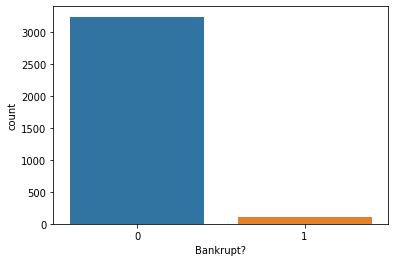

In [10]:
sns.countplot(train['Bankrupt?'])

<Axes: xlabel=' Total Asset Turnover', ylabel='count'>

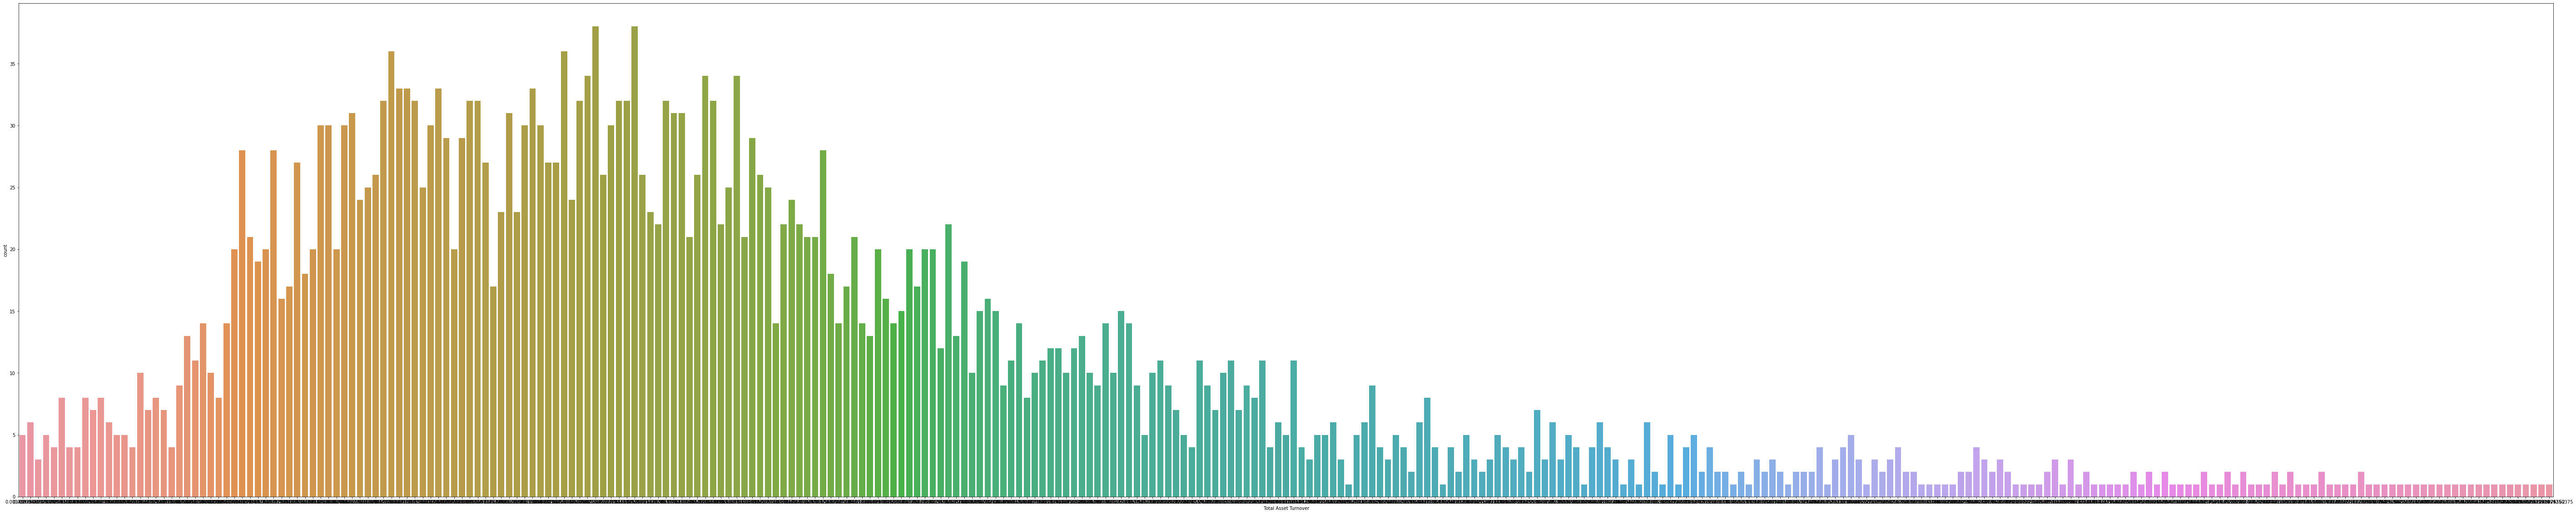

In [11]:
plt.figure(figsize=(100, 20))
sns.countplot(x=' Total Asset Turnover', data=train)

In [12]:
train.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

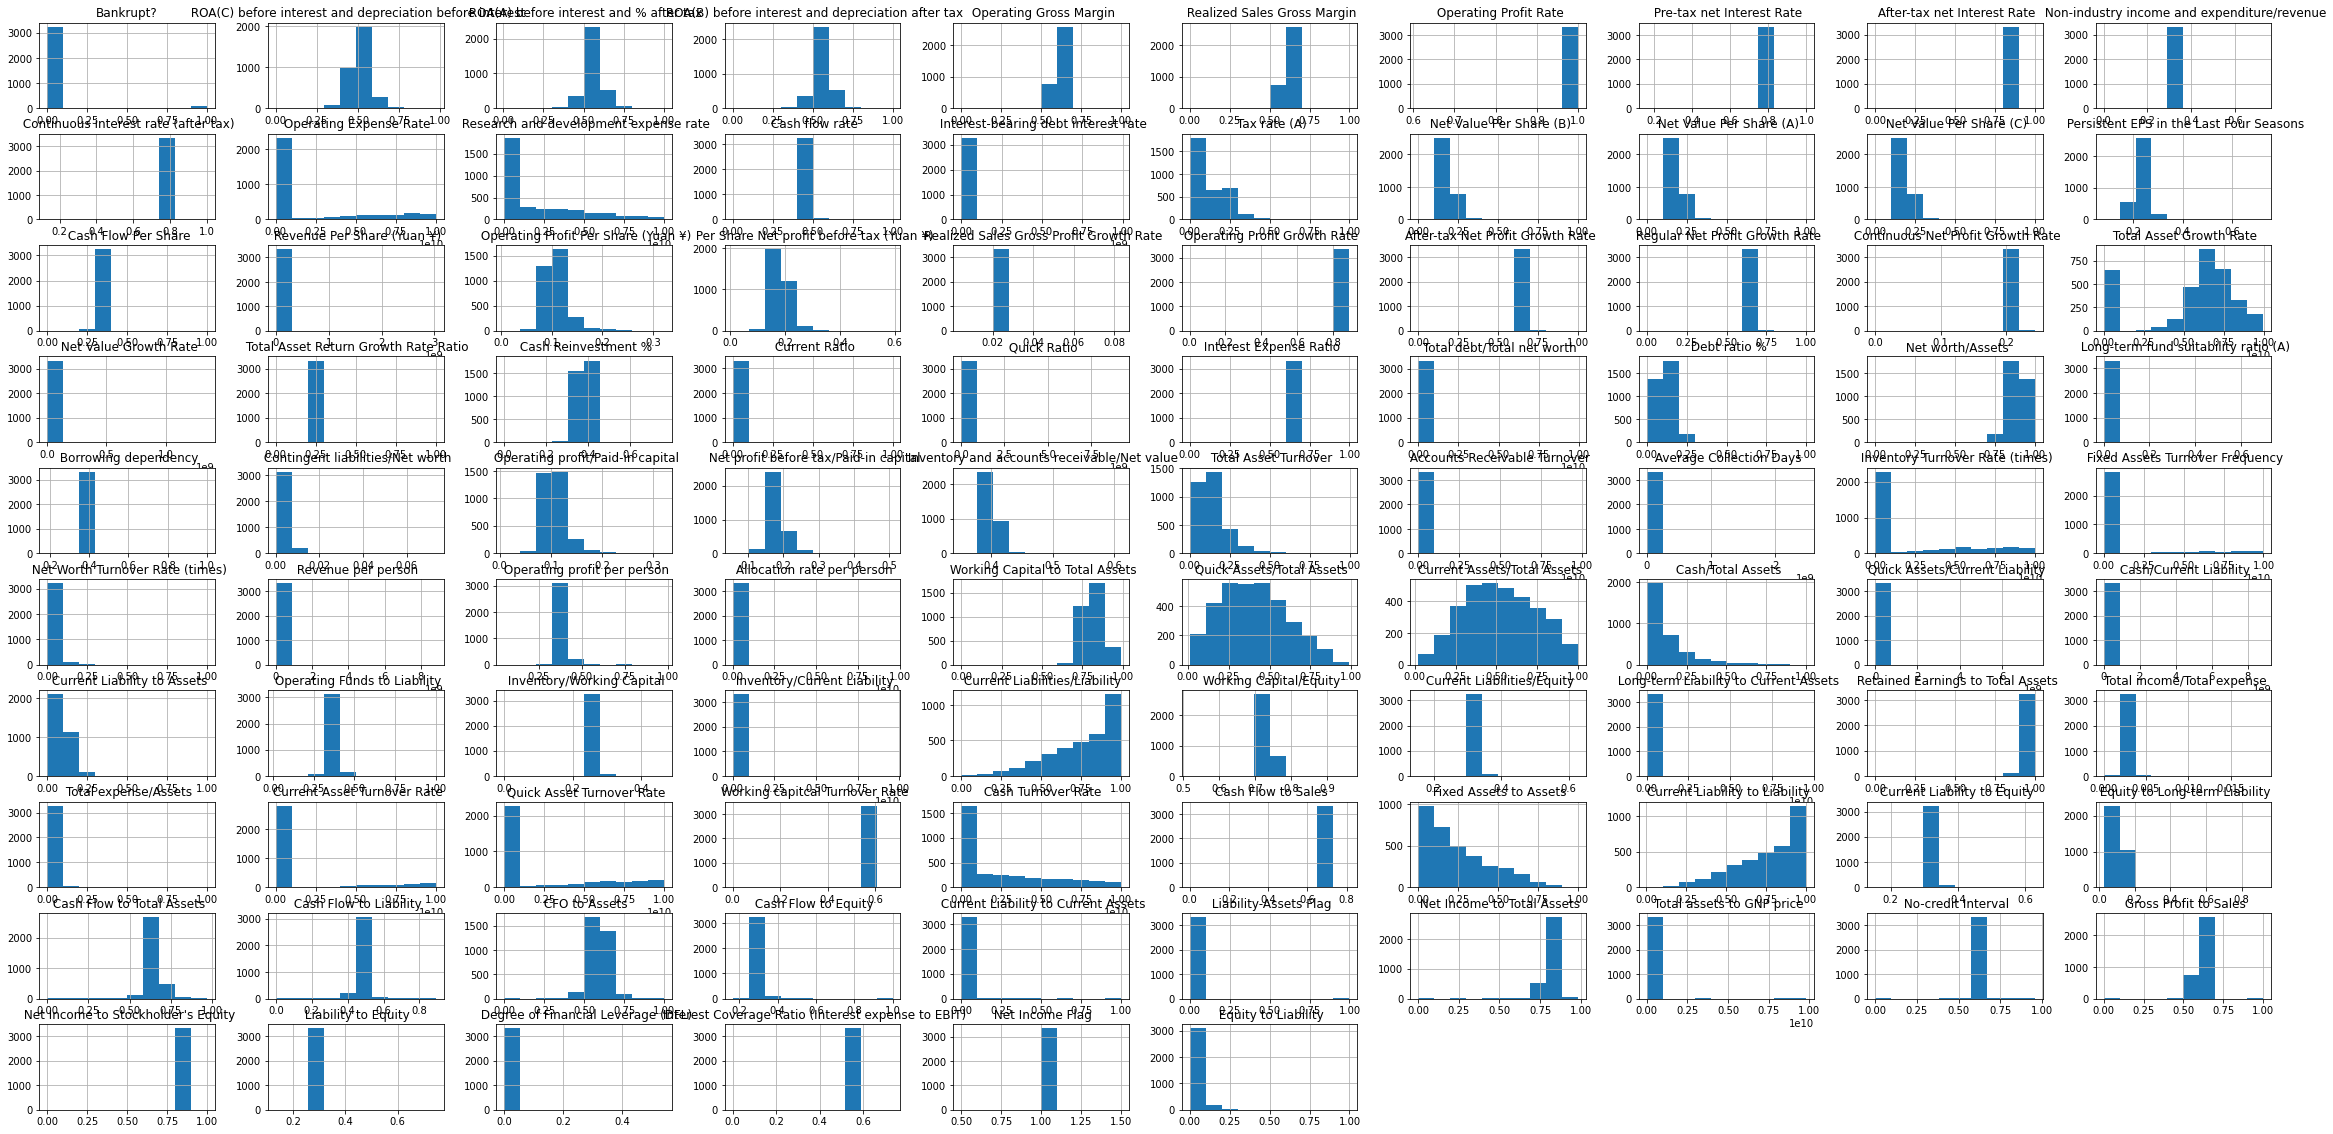

In [13]:
train.hist(bins = 10, figsize=(40, 20))
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


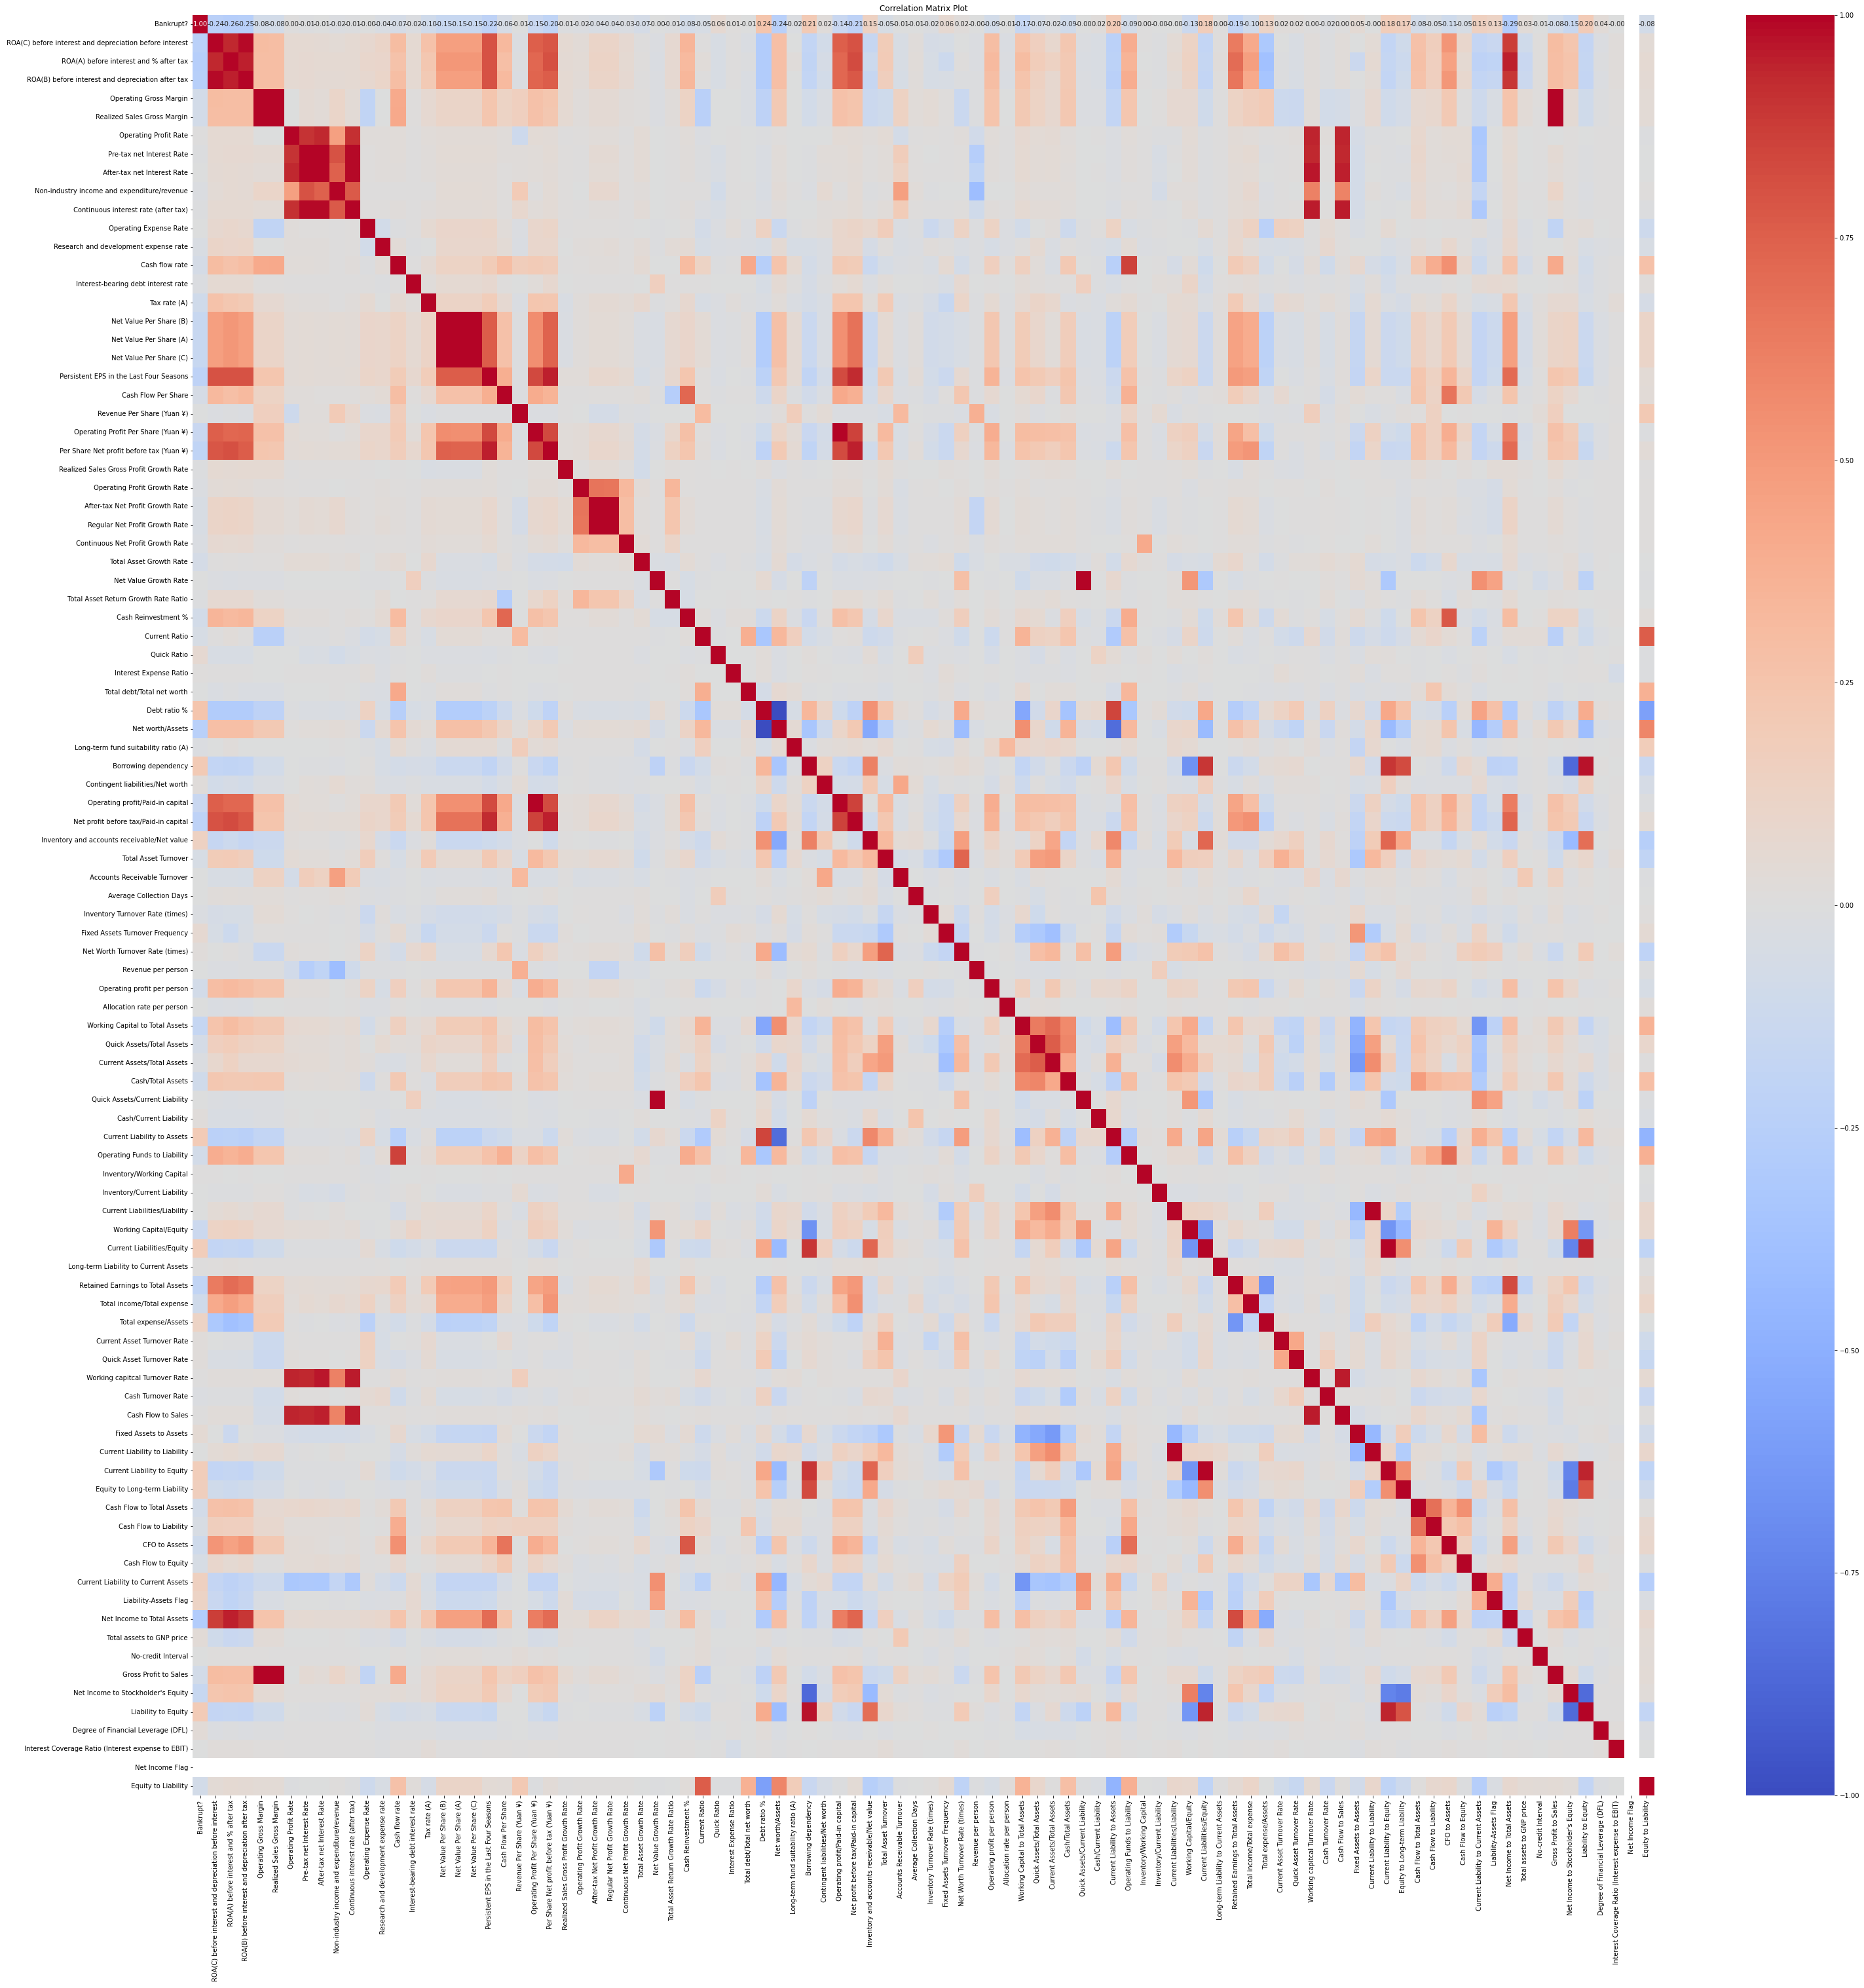

In [14]:
correlation_matrix = train.corr()


plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Plot')
plt.show()

In [15]:
correlation_matrix_rounded = correlation_matrix.round(2)
correlation_matrix_rounded

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.00,-0.24,-0.26,-0.25,-0.08,-0.08,0.00,-0.01,-0.01,-0.02,...,-0.29,0.03,-0.01,-0.08,-0.15,0.20,0.04,-0.00,NaN,-0.08
ROA(C) before interest and depreciation before interest,-0.24,1.00,0.94,0.99,0.30,0.30,0.06,0.06,0.05,0.05,...,0.87,-0.10,0.01,0.30,0.24,-0.18,-0.02,0.02,NaN,0.05
ROA(A) before interest and % after tax,-0.26,0.94,1.00,0.95,0.29,0.29,0.06,0.07,0.05,0.06,...,0.95,-0.14,0.02,0.29,0.26,-0.17,-0.01,0.02,NaN,0.06
ROA(B) before interest and depreciation after tax,-0.25,0.99,0.95,1.00,0.30,0.29,0.06,0.06,0.05,0.05,...,0.90,-0.13,0.01,0.30,0.25,-0.17,-0.02,0.02,NaN,0.05
Operating Gross Margin,-0.08,0.30,0.29,0.30,1.00,1.00,-0.00,0.05,0.04,0.11,...,0.26,0.04,0.01,1.00,0.05,-0.09,-0.01,0.01,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.20,-0.18,-0.17,-0.17,-0.09,-0.09,-0.01,-0.01,-0.01,-0.02,...,-0.20,0.00,0.00,-0.09,-0.85,1.00,0.01,0.00,NaN,-0.19
Degree of Financial Leverage (DFL),0.04,-0.02,-0.01,-0.02,-0.01,-0.01,0.00,0.00,0.00,0.00,...,-0.01,-0.00,-0.02,-0.01,0.00,0.01,1.00,0.02,NaN,-0.02
Interest Coverage Ratio (Interest expense to EBIT),-0.00,0.02,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,...,0.01,0.00,-0.00,0.01,0.00,0.00,0.02,1.00,NaN,-0.01
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


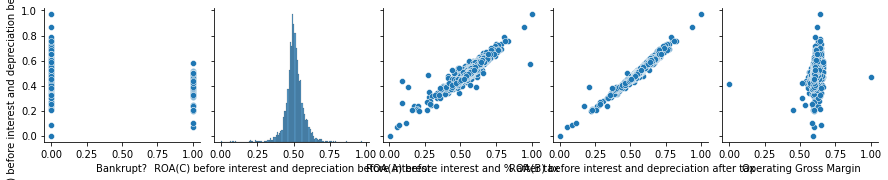

In [16]:
sns.pairplot(train, y_vars=train.columns.values[1:2], x_vars=train.columns.values[:5])

In [17]:
high_correlation_pairs = {}
for i in range(len(correlation_matrix_rounded.columns)):
    for j in range(i+1, len(correlation_matrix_rounded.columns)):
        pair = (correlation_matrix_rounded.columns[i], correlation_matrix_rounded.columns[j])
        correlation_value = correlation_matrix_rounded.iloc[i, j]
        if abs(correlation_value) > 0.5:
            high_correlation_pairs[pair] = correlation_value


for pair, correlation_value in high_correlation_pairs.items():
    print(f"Pair: {pair}, Correlation Value: {correlation_value}")

Pair: (' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax'), Correlation Value: 0.94
Pair: (' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax'), Correlation Value: 0.99
Pair: (' ROA(C) before interest and depreciation before interest', ' Persistent EPS in the Last Four Seasons'), Correlation Value: 0.8
Pair: (' ROA(C) before interest and depreciation before interest', ' Operating Profit Per Share (Yuan ¥)'), Correlation Value: 0.75
Pair: (' ROA(C) before interest and depreciation before interest', ' Per Share Net profit before tax (Yuan ¥)'), Correlation Value: 0.78
Pair: (' ROA(C) before interest and depreciation before interest', ' Operating profit/Paid-in capital'), Correlation Value: 0.75
Pair: (' ROA(C) before interest and depreciation before interest', ' Net profit before tax/Paid-in capital'), Correlation Value: 0.8
Pair: (' ROA(C) before interest and depreciation befo

<Axes: >

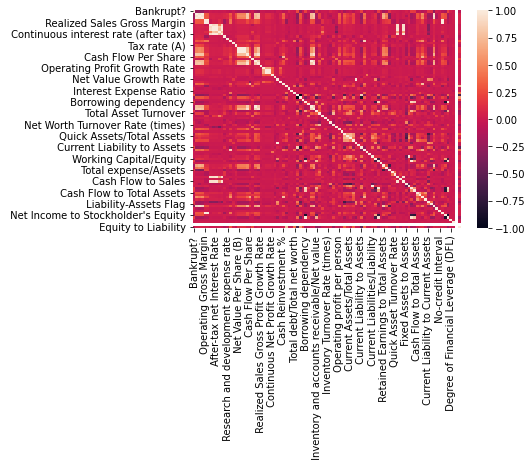

In [18]:
sns.heatmap(train.corr())

## Szukamy kolumn z bardzo małym odchyleniem standardowym

In [19]:
std_devs = train.std()
columns_with_low_std_dev = std_devs[std_devs < 0.05]
print(columns_with_low_std_dev)

 Operating Gross Margin                                0.017777
 Realized Sales Gross Margin                           0.017762
 Operating Profit Rate                                 0.006803
 Pre-tax net Interest Rate                             0.012108
 After-tax net Interest Rate                           0.014789
 Non-industry income and expenditure/revenue           0.010404
 Continuous interest rate (after tax)                  0.012013
 Cash flow rate                                        0.019198
 Net Value Per Share (B)                               0.034272
 Net Value Per Share (A)                               0.034376
 Net Value Per Share (C)                               0.034392
 Persistent EPS in the Last Four Seasons               0.030230
 Cash Flow Per Share                                   0.019107
 Operating Profit Per Share (Yuan ¥)                   0.023341
 Per Share Net profit before tax (Yuan ¥)              0.029797
 Realized Sales Gross Profit Growth Rate

## End of EDA

# MODEL BUILDING

In order to build models, we need to split the data

In [20]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0:1]
y_train = y_train.values.ravel() # flattens the df to 1-dim array


x_val = validation.iloc[:, 1:]
y_val = validation.iloc[:, 0:1]
y_val = validation.values.ravel() # flattens the df to 1-dim array
y_val = validation.iloc[:, 0].values.ravel()

df_x = x_val
df_y = y_val

Now we define a few helper functions - it will make the process of building models much easier to understand

In [21]:
def filter_data(input_df, train_x_df): # Applies the same changes for multiple df
    threshold = 0.00 # Selecting the variance threshold - very low (zero)
    sel = VarianceThreshold(threshold=threshold)
    transformed_features = sel.fit_transform(train_x_df)
    selected_columns = sel.get_support(indices=True)
    selected_columns = input_df.columns[selected_columns]
    selected_df = input_df[selected_columns]
    selected_df # df with the low variance columns removed
    return selected_df

In [22]:
def replace_outliers_with_iqr(df):
    df_copy = df.copy()  # Stwórz kopię ramki danych, aby uniknąć modyfikacji oryginalnej ramki danych
    for col in df_copy.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Zastępowanie outlierów medianą kolumny
        df_copy.loc[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), col] = df_copy[col].median()
    
    return df_copy

In [23]:
def normalize_data(input_df):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(input_df)
    normalized_df = pd.DataFrame(normalized_data, columns=input_df.columns)
    return normalized_df

In [24]:
# Create a function to plot ROC curve
def plot_roc(model, X_test, y_test, title = 'Receiver Operating Characteristic'):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [25]:
def calculate_metrics(actual, predictions, title = 'Receiver Operating Characteristic (ROC) Curve'):
    """
    as actual use the real data, as predictions use the predicted values
    
    Helper func. to calculate multiple scores
    """
    ## Compute accuracy
    #accuracy = accuracy_score(actual, predictions)

    ## Compute precision
    #precision = precision_score(actual, predictions, zero_division='warn')

    ## Compute recall
    #recall = recall_score(actual, predictions)

    ## Compute F1-score
    ##f1 = f1_score(actual, predictions)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(actual, predictions)
    roc_auc = auc(fpr, tpr)

    ## Print all the metrics
    #print("Accuracy:", accuracy)
    #print("Precision:", precision)
    #print("Recall:", recall)
    #print("F1-score:", f1)
    print("ROC AUC score:", roc_auc)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    # Compute confusion matrix
    #cm = confusion_matrix(actual, predictions)

    ## Plot confusion matrix
    #plt.figure(figsize=(8, 6))
    #sns.heatmap(cm, annot=True, fmt="d", cmap="YlGn", cbar=False)
    #plt.xlabel('Predicted')
    #plt.ylabel('Actual')
    #plt.title('Confusion Matrix')
    #plt.show()


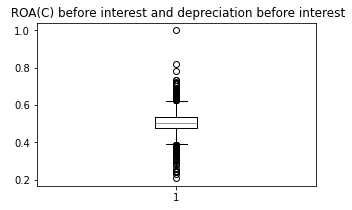

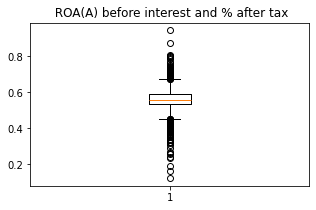

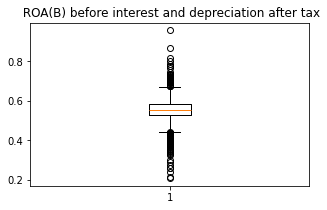

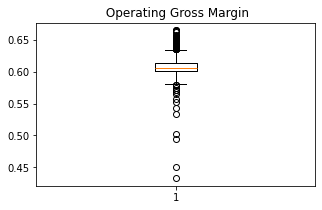

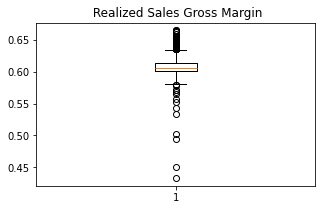

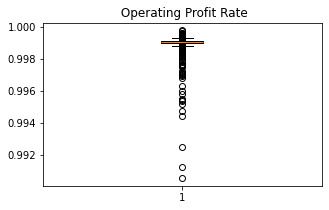

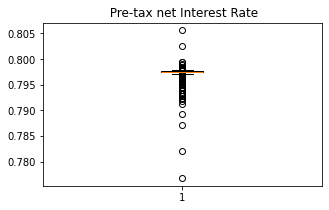

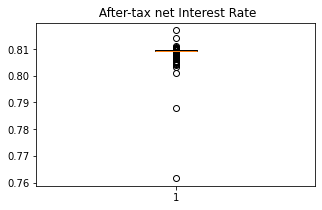

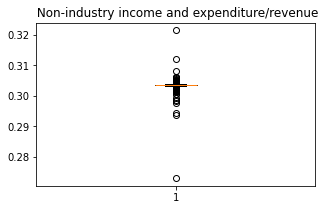

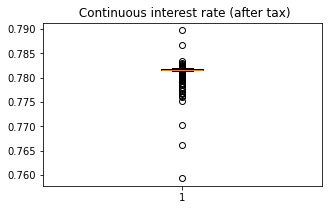

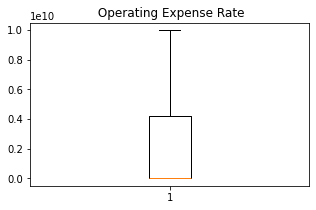

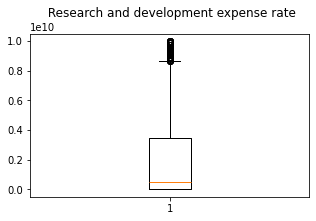

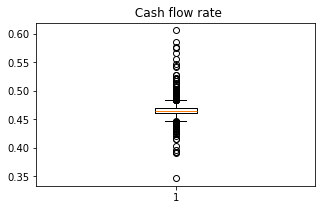

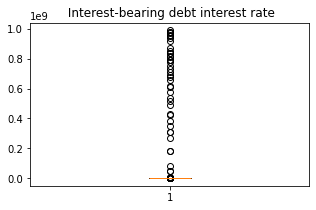

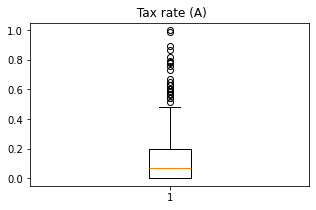

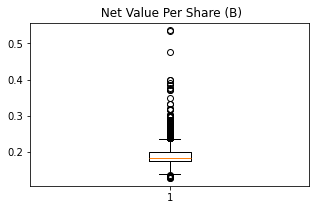

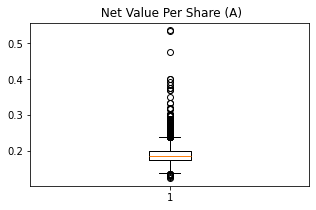

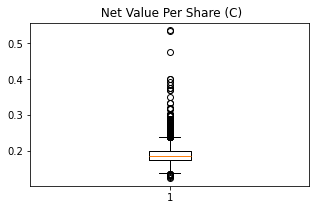

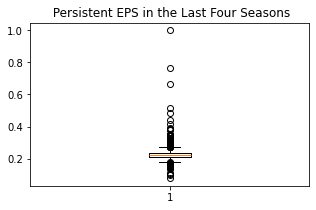

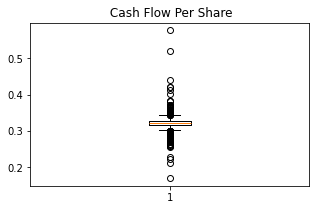

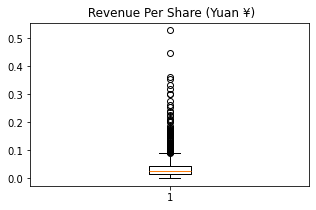

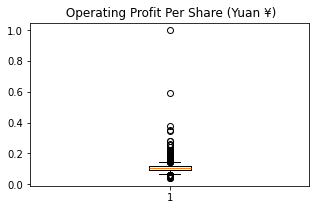

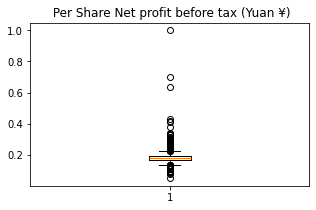

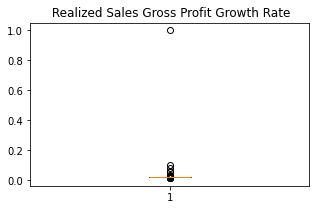

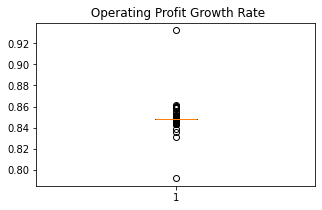

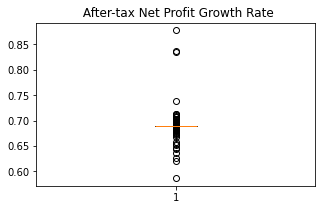

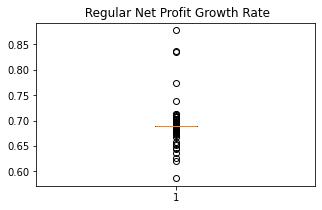

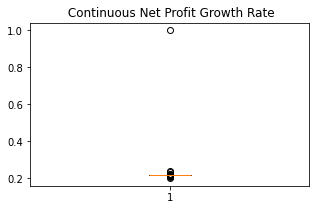

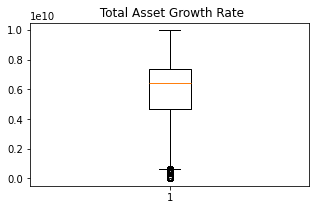

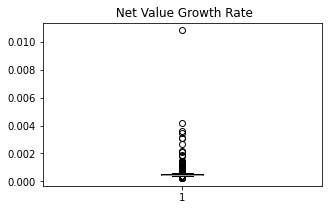

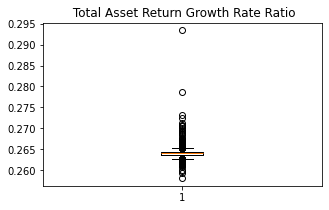

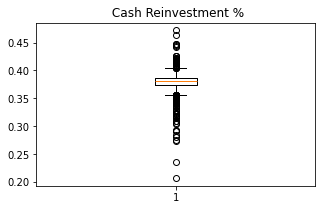

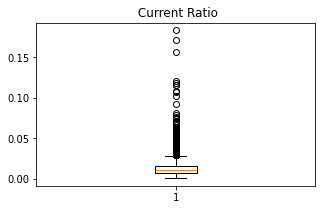

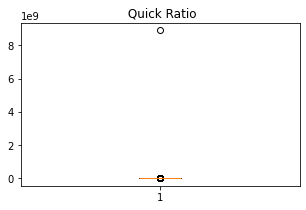

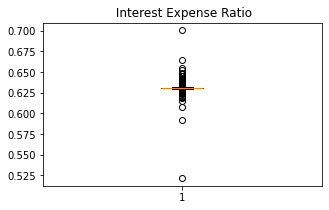

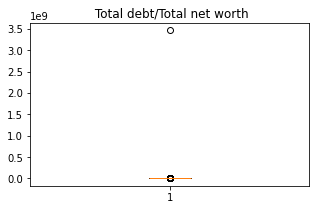

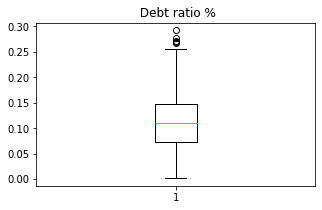

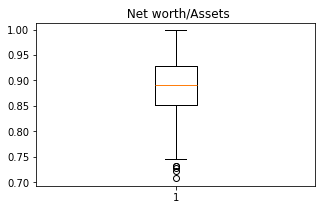

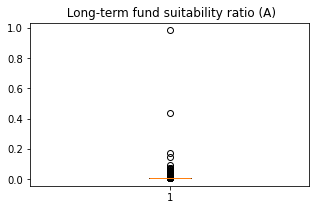

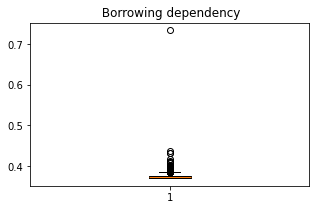

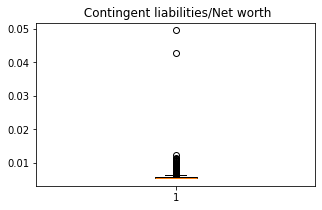

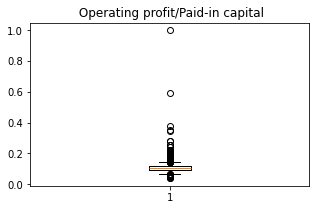

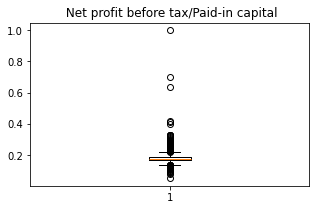

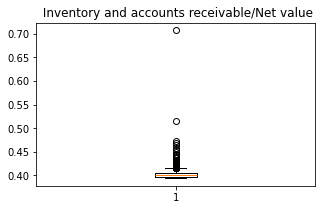

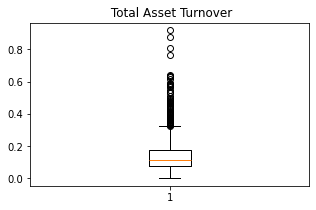

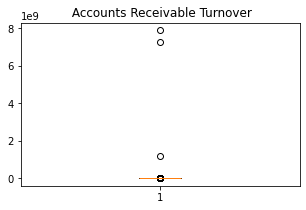

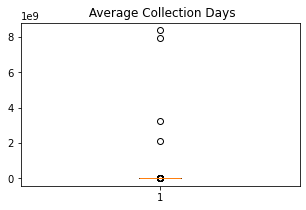

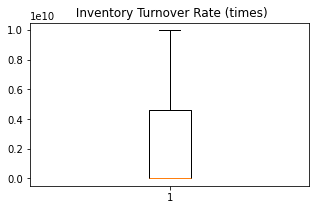

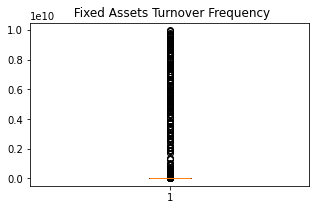

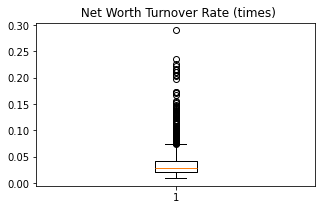

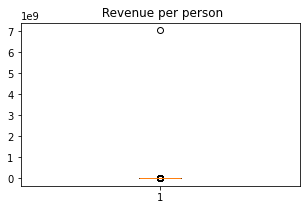

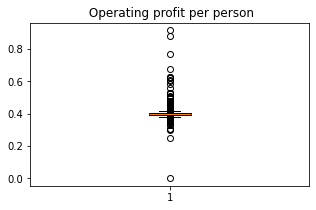

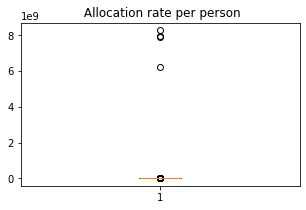

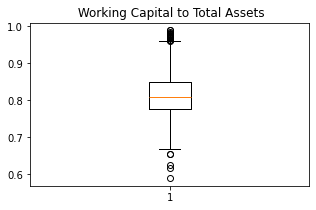

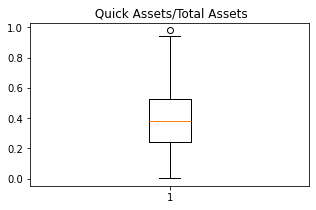

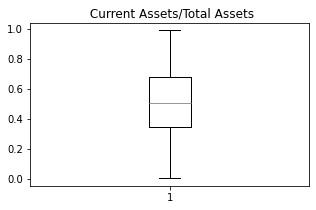

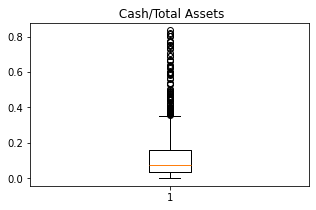

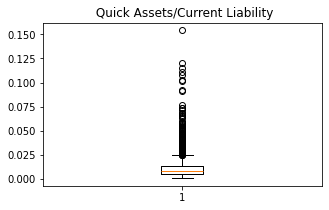

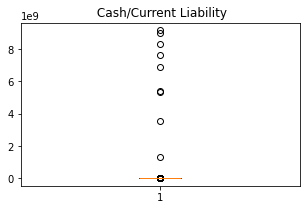

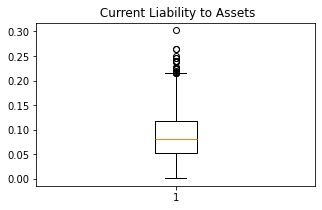

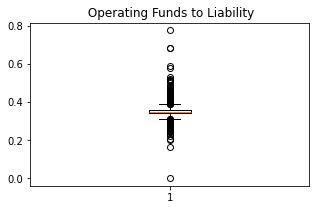

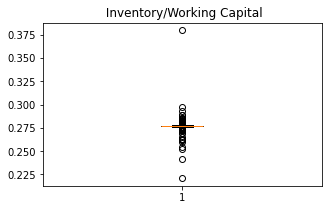

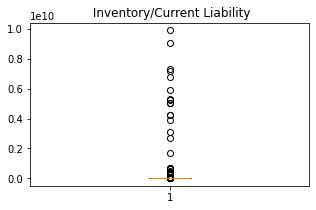

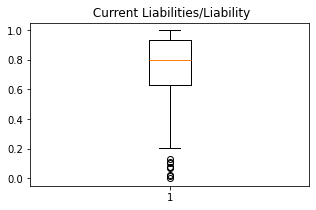

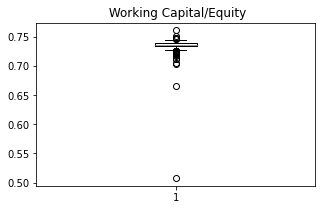

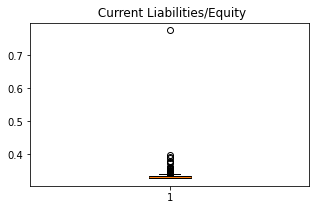

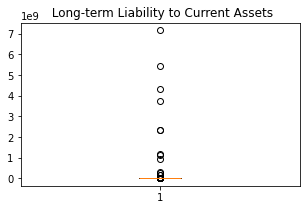

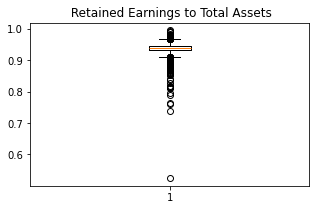

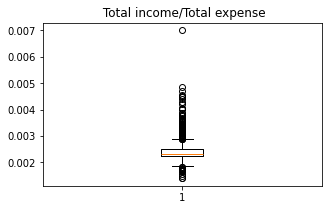

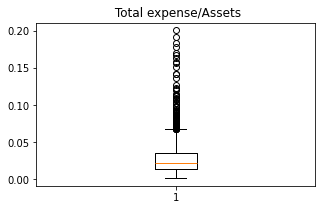

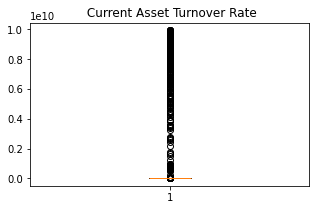

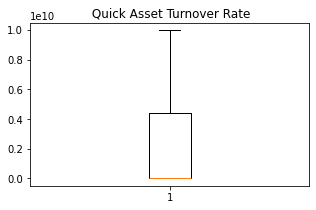

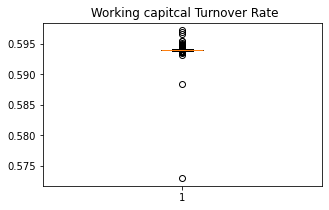

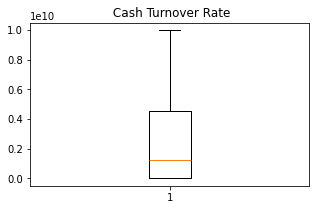

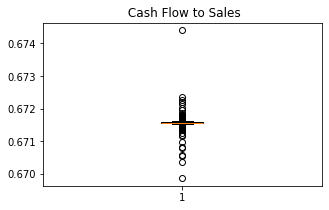

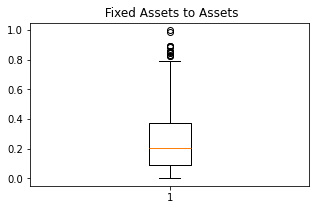

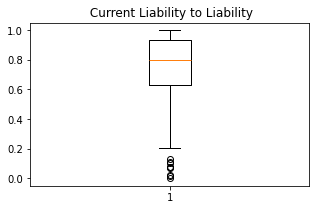

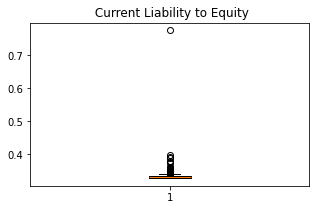

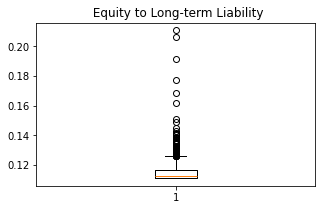

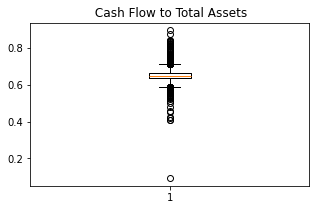

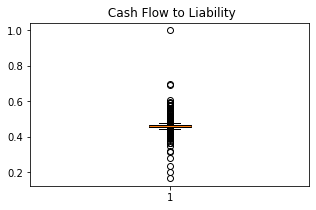

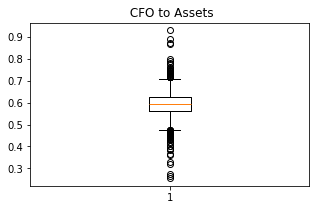

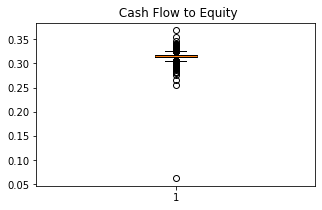

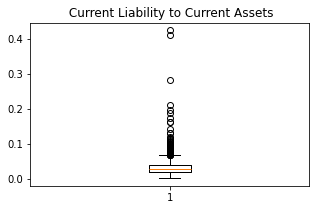

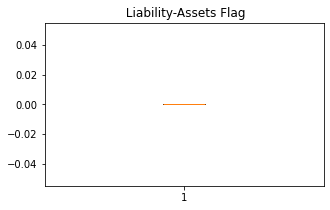

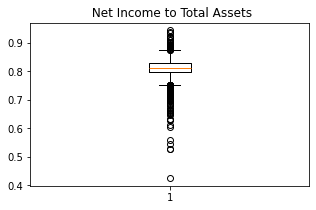

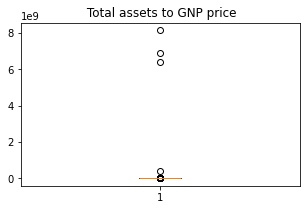

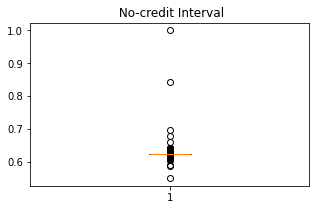

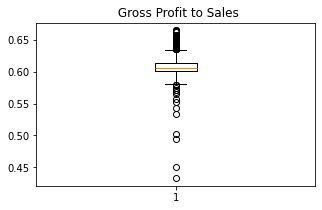

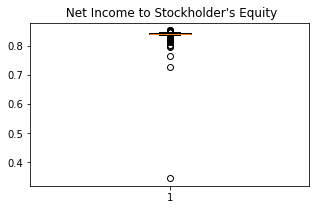

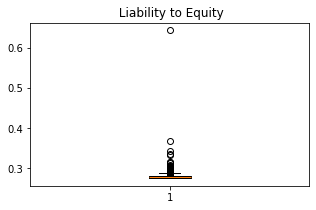

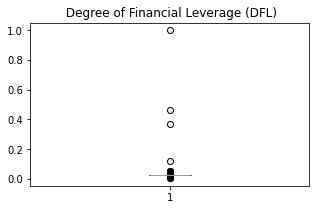

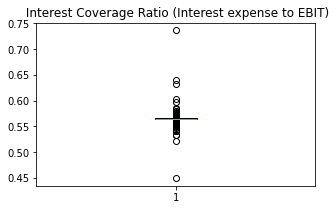

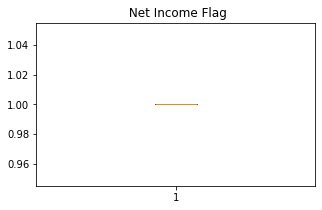

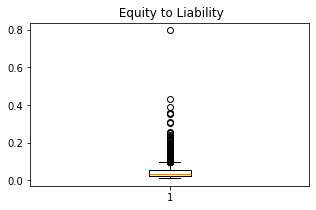

In [26]:
for column in df_x.columns:
    plt.figure(figsize=(5, 3))  # Rozmiar każdego wykresu
    plt.boxplot(df_x[column])  # Rysowanie wykresu pudełkowego dla konkretnej zmiennej
    plt.title(column)  # Tytuł wykresu
    plt.show()

In [27]:
df_x = filter_data(df_x, x_train) # we remove the variables with a variance of 0
x_train = filter_data(x_train, x_train)
df_x = replace_outliers_with_iqr(df_x) # now we replace the outliers
x_train = replace_outliers_with_iqr(x_train)

Now we'll plot to see how the data looks after cleaning it up

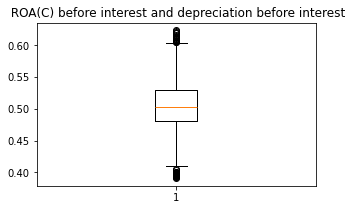

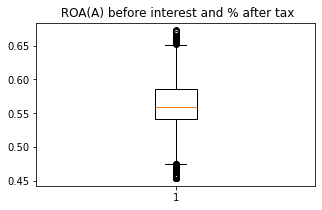

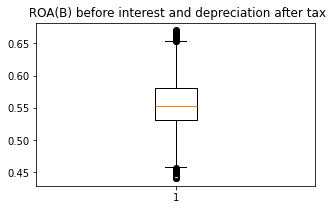

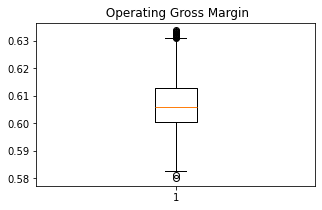

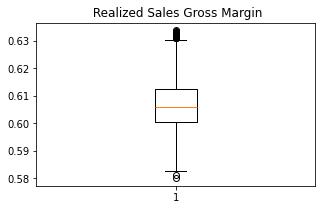

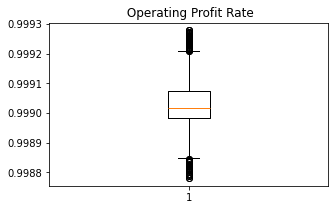

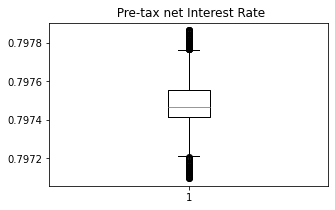

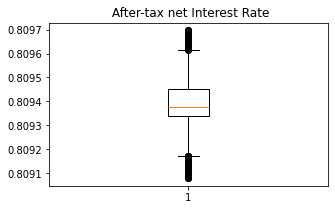

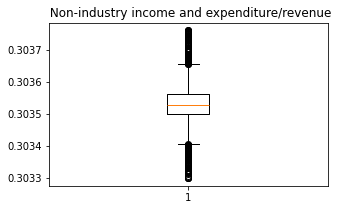

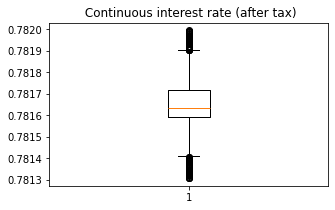

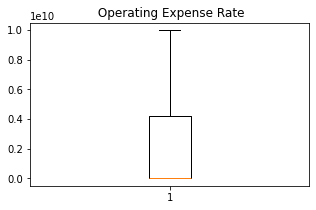

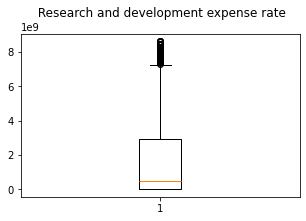

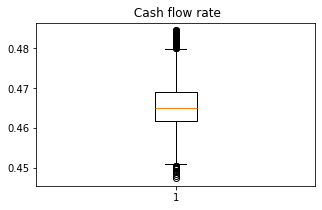

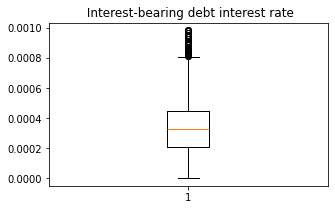

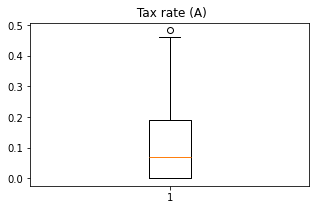

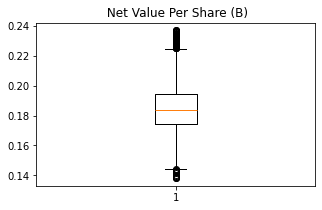

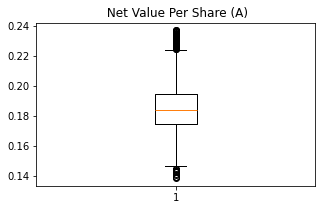

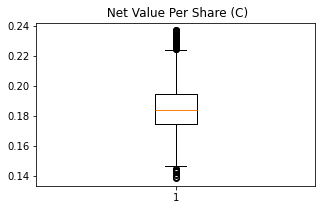

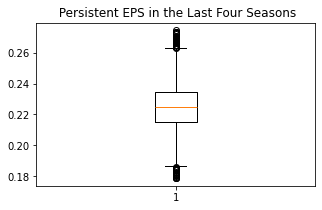

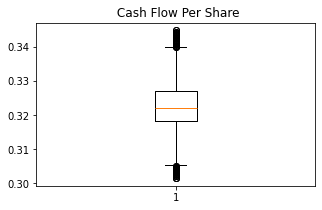

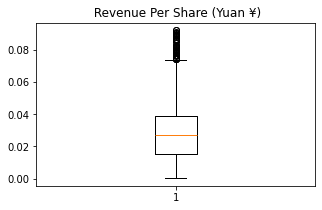

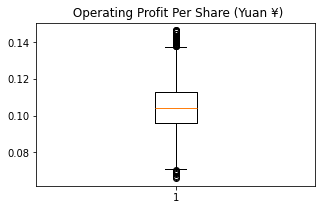

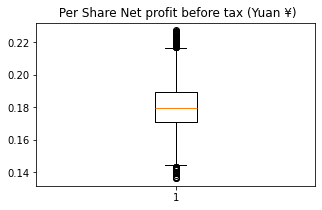

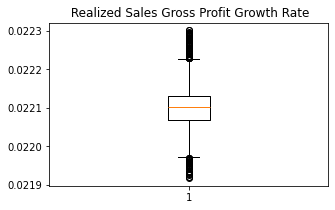

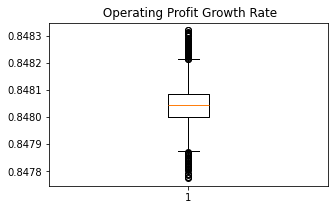

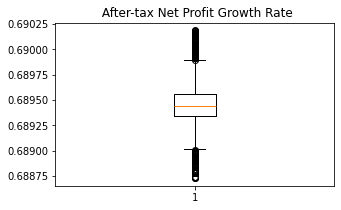

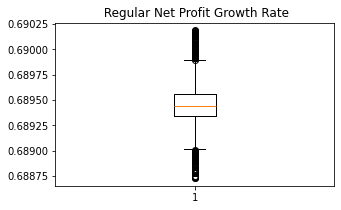

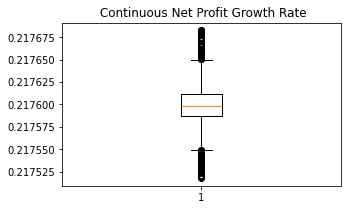

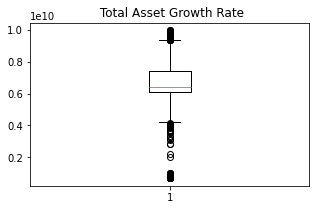

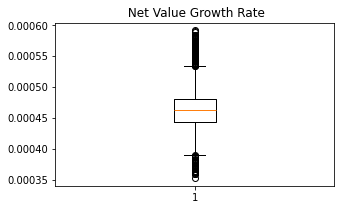

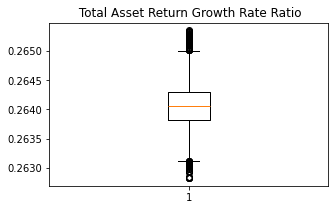

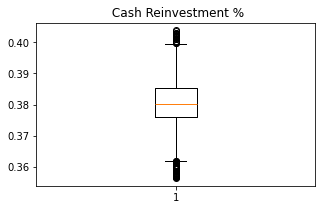

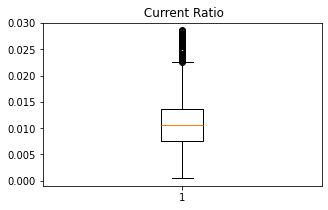

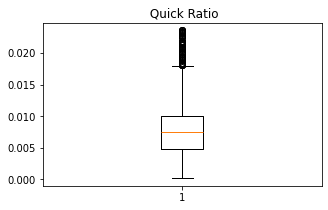

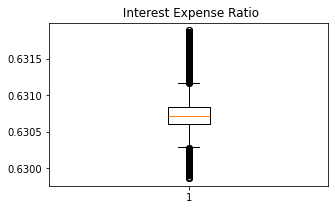

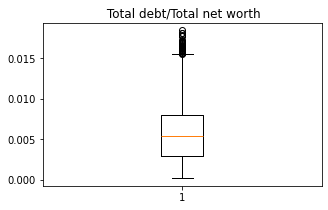

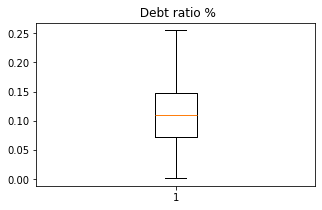

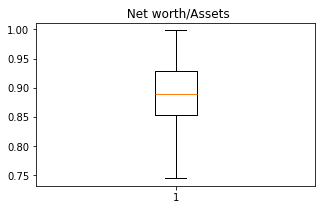

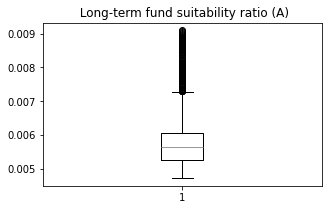

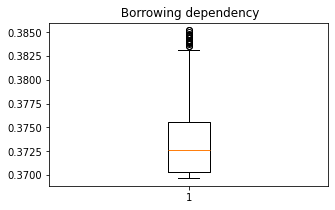

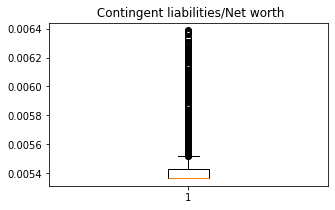

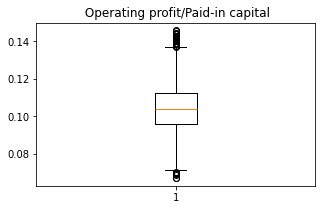

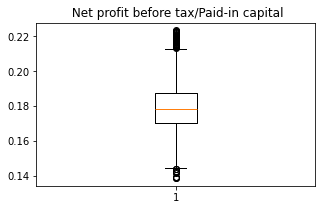

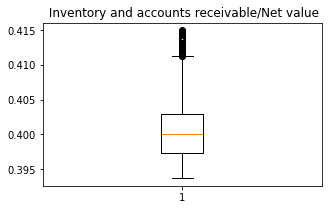

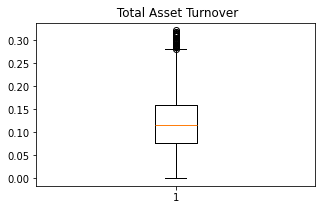

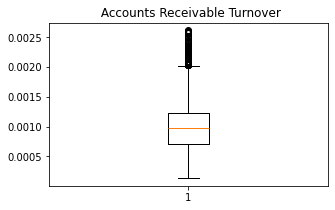

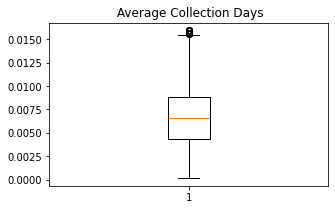

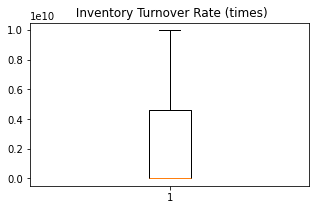

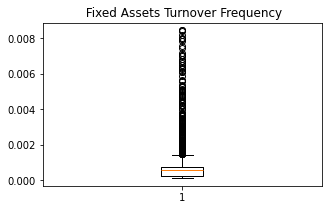

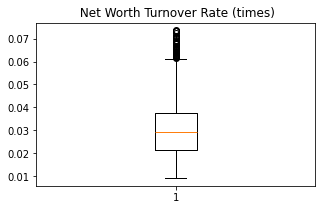

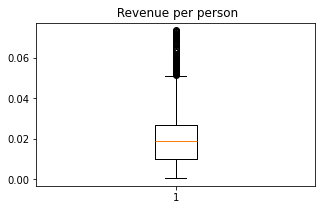

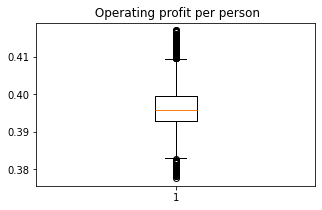

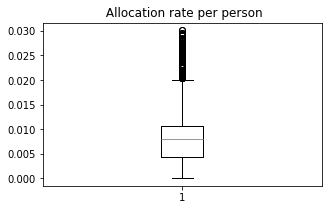

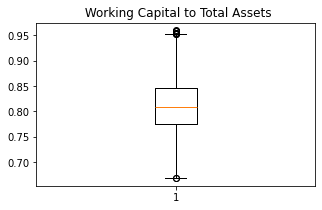

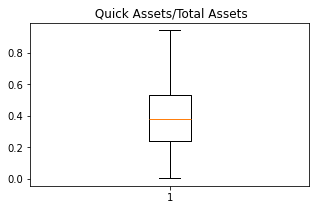

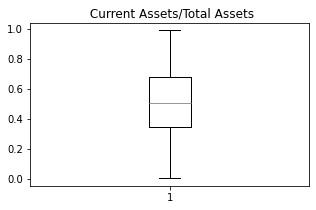

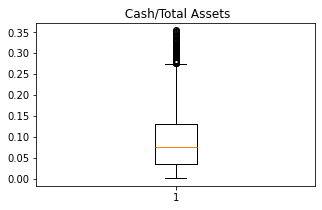

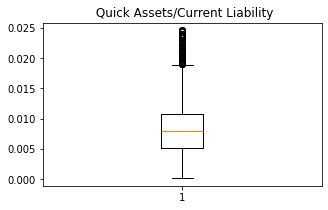

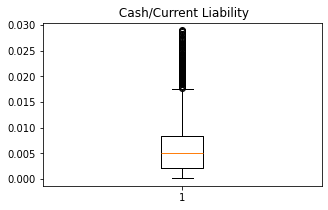

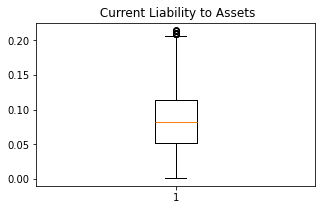

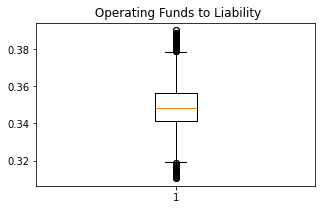

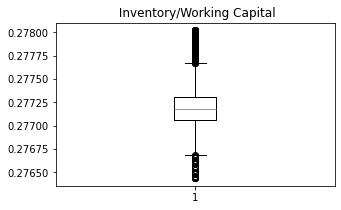

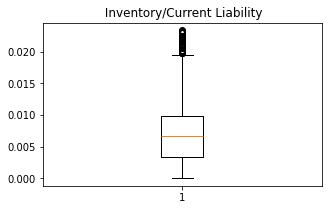

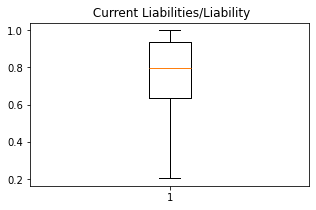

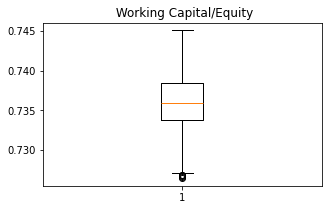

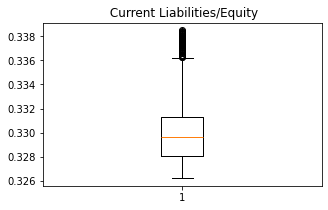

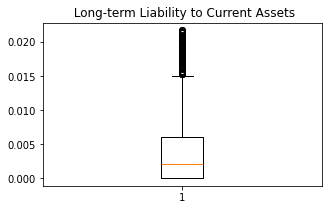

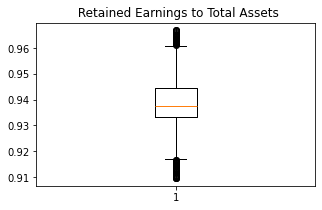

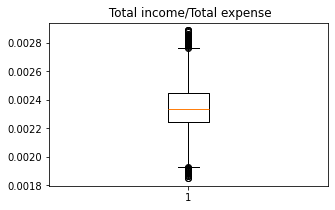

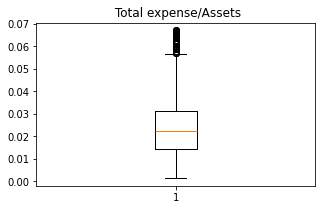

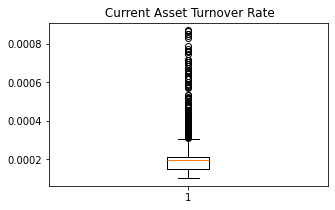

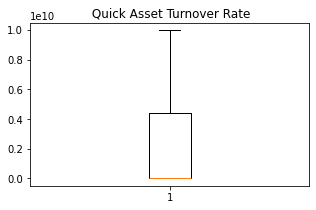

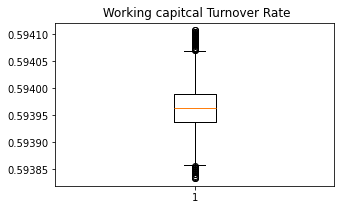

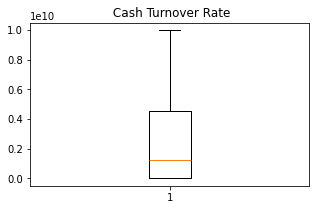

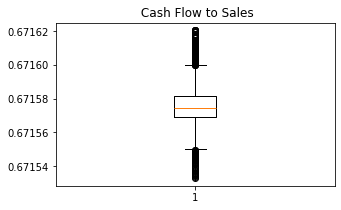

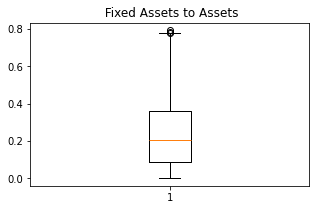

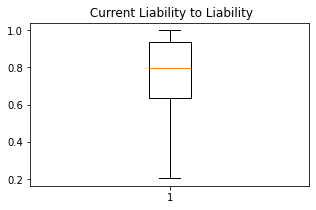

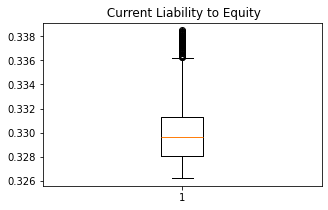

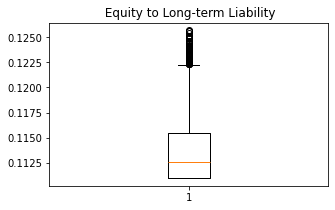

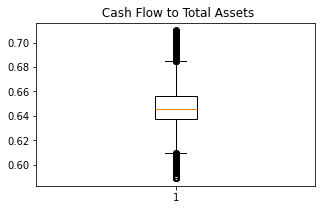

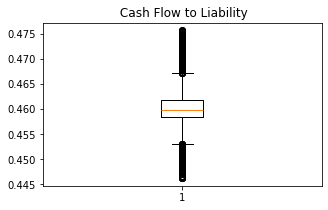

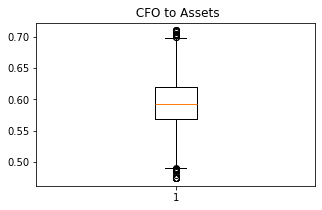

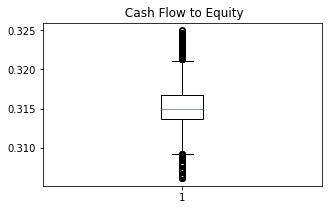

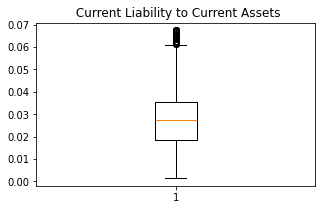

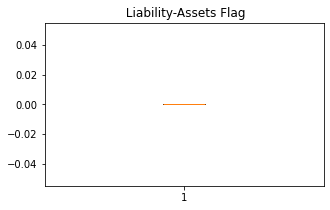

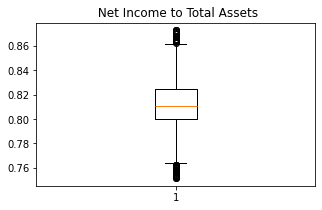

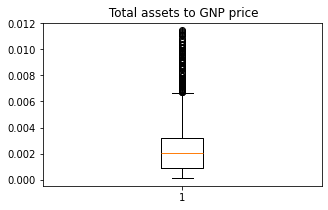

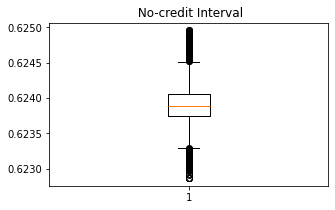

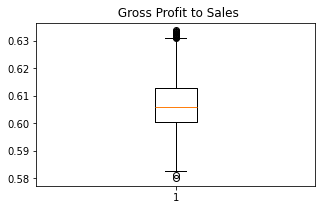

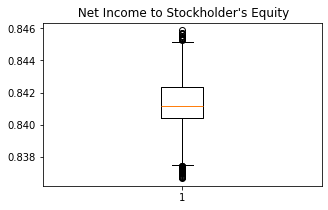

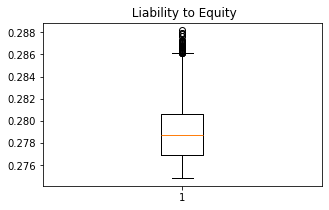

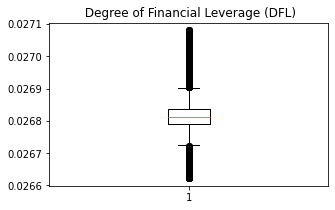

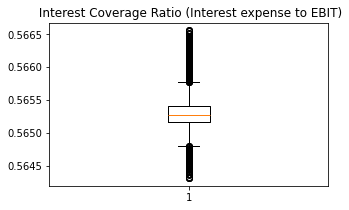

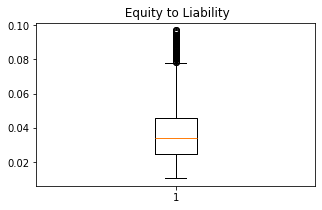

In [28]:
for column in df_x.columns:
    plt.figure(figsize=(5, 3))  # Rozmiar każdego wykresu
    plt.boxplot(df_x[column])  # Rysowanie wykresu pudełkowego dla konkretnej zmiennej
    plt.title(column)  # Tytuł wykresu
    plt.show()

In [29]:
df_x = normalize_data(df_x) # Now we normalize the data
x_train = normalize_data(x_train)

In [30]:
df_x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.529338,0.549243,0.551387,0.490369,0.487426,0.496408,0.454725,0.460311,0.437598,0.463603,...,0.0,0.524179,0.039827,0.388528,0.490390,0.588650,0.651916,0.902163,0.798498,0.123383
1,0.779286,0.703299,0.847122,0.503210,0.503210,0.781460,0.713411,0.762075,0.545692,0.751118,...,0.0,0.670359,0.879299,0.443690,0.503245,0.649609,0.259364,0.477362,0.478841,0.308172
2,0.481416,0.484743,0.485435,0.479334,0.479066,0.477289,0.478218,0.479000,0.626632,0.995730,...,0.0,0.486472,0.033859,0.587119,0.479332,0.915882,0.100462,0.388230,0.396926,0.759186
3,0.583838,0.592905,0.573759,0.403157,0.401953,0.485284,0.503330,0.508400,0.603655,0.488613,...,0.0,0.594101,0.172833,0.637431,0.403103,0.570178,0.230155,0.573706,0.560834,0.346152
4,0.481416,0.874969,0.485435,0.703986,0.703986,0.477289,0.948515,0.479000,0.491906,0.475397,...,0.0,0.823038,0.172833,0.454017,0.703943,0.919077,0.485992,0.428041,0.434278,0.165742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0.384005,0.370876,0.384060,0.346709,0.346709,0.254693,0.372817,0.374843,0.744648,0.381456,...,0.0,0.370458,0.047330,0.388323,0.346688,0.368921,0.189727,0.410911,0.426732,0.417123
1428,0.405721,0.452741,0.413890,0.267389,0.268994,0.378679,0.555176,0.558589,0.994256,0.558357,...,0.0,0.501784,0.172833,0.487150,0.267428,0.470813,0.131224,0.380427,0.389454,0.592188
1429,0.639382,0.605309,0.592869,0.706929,0.700642,0.826651,0.616382,0.573499,0.162402,0.587637,...,0.0,0.631951,0.075123,0.591138,0.706899,0.600830,0.219757,0.385008,0.393847,0.362011
1430,0.768428,0.644753,0.724773,0.504682,0.504682,0.682966,0.691629,0.693616,0.704439,0.619561,...,0.0,0.665801,0.172833,0.187357,0.504638,0.588215,0.103456,0.375445,0.384658,0.738929


### From now on, we'll use x_train to train the data and df_x will be used for predictions

In [31]:
df_x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.529338,0.549243,0.551387,0.490369,0.487426,0.496408,0.454725,0.460311,0.437598,0.463603,...,0.0,0.524179,0.039827,0.388528,0.490390,0.588650,0.651916,0.902163,0.798498,0.123383
1,0.779286,0.703299,0.847122,0.503210,0.503210,0.781460,0.713411,0.762075,0.545692,0.751118,...,0.0,0.670359,0.879299,0.443690,0.503245,0.649609,0.259364,0.477362,0.478841,0.308172
2,0.481416,0.484743,0.485435,0.479334,0.479066,0.477289,0.478218,0.479000,0.626632,0.995730,...,0.0,0.486472,0.033859,0.587119,0.479332,0.915882,0.100462,0.388230,0.396926,0.759186
3,0.583838,0.592905,0.573759,0.403157,0.401953,0.485284,0.503330,0.508400,0.603655,0.488613,...,0.0,0.594101,0.172833,0.637431,0.403103,0.570178,0.230155,0.573706,0.560834,0.346152
4,0.481416,0.874969,0.485435,0.703986,0.703986,0.477289,0.948515,0.479000,0.491906,0.475397,...,0.0,0.823038,0.172833,0.454017,0.703943,0.919077,0.485992,0.428041,0.434278,0.165742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0.384005,0.370876,0.384060,0.346709,0.346709,0.254693,0.372817,0.374843,0.744648,0.381456,...,0.0,0.370458,0.047330,0.388323,0.346688,0.368921,0.189727,0.410911,0.426732,0.417123
1428,0.405721,0.452741,0.413890,0.267389,0.268994,0.378679,0.555176,0.558589,0.994256,0.558357,...,0.0,0.501784,0.172833,0.487150,0.267428,0.470813,0.131224,0.380427,0.389454,0.592188
1429,0.639382,0.605309,0.592869,0.706929,0.700642,0.826651,0.616382,0.573499,0.162402,0.587637,...,0.0,0.631951,0.075123,0.591138,0.706899,0.600830,0.219757,0.385008,0.393847,0.362011
1430,0.768428,0.644753,0.724773,0.504682,0.504682,0.682966,0.691629,0.693616,0.704439,0.619561,...,0.0,0.665801,0.172833,0.187357,0.504638,0.588215,0.103456,0.375445,0.384658,0.738929


## Logistic Regression

In [32]:
lr_model = LogisticRegression(max_iter=10000) # large limit, to make sure it will be built - didn't always work if it was smaller
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
lr_model_pred = lr_model.predict(df_x)

ROC AUC score: 0.5450717430977614


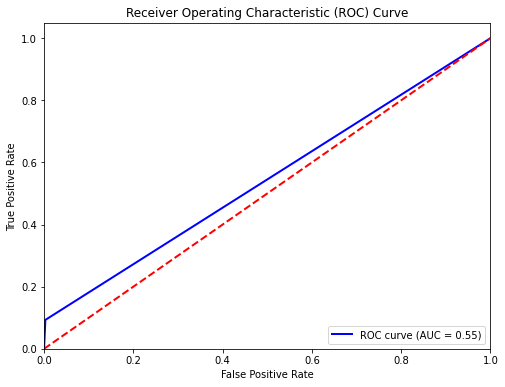

In [34]:
calculate_metrics(df_y, lr_model_pred)

Let's see if a gridsearach optimizer will find a better model

In [35]:
param_grid = { # Define the parameter grid
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Train the model with the best parameters
best_lr_model = grid_search.best_estimator_
best_lr_model.fit(x_train, y_train)


LogisticRegression(C=0.001, max_iter=10000, penalty='l1', solver='liblinear')

ROC AUC score: 0.5


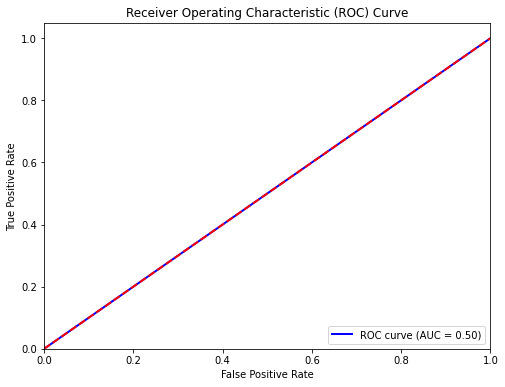

In [36]:
best_lr_model_pred = best_lr_model.predict(df_x)
calculate_metrics(df_y, best_lr_model_pred)

It didn't.
Let's change the class_weight and see if it makes a difference - there's not a lot of positive values in the data set, so it should help

In [37]:
lr2_model = LogisticRegression(max_iter=10000, class_weight='balanced')
lr2_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [38]:
lr2_model_pred = lr2_model.predict(df_x)

ROC AUC score: 0.833902590118372


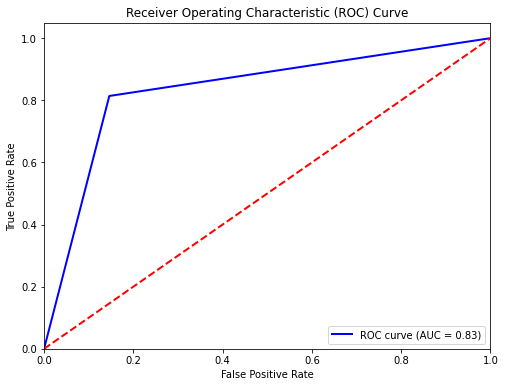

In [39]:
calculate_metrics(df_y, lr2_model_pred)

# DecisionTREE

In [40]:
DT_model = DecisionTreeClassifier() # Create a decision tree classifier object

DT_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [41]:
DT_model_pred = DT_model.predict(df_x)

ROC AUC score: 0.699189646223651


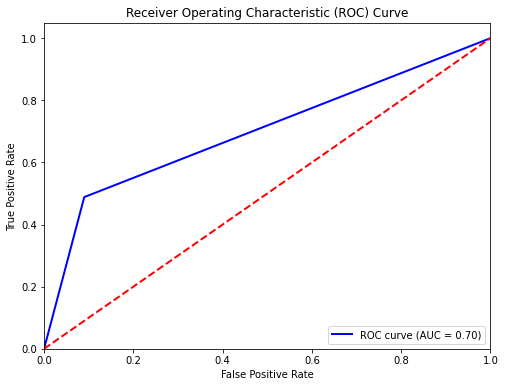

In [42]:
calculate_metrics(df_y, DT_model_pred)

### As we can see, the results are poor

# Random Forest

In [43]:
RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)



RandomForestClassifier()

ROC AUC score: 0.5447117718954576


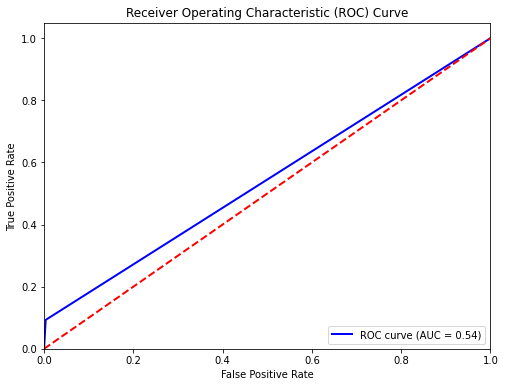

In [44]:
RF_model_pred = RF_model.predict(df_x)

calculate_metrics(df_y, RF_model_pred)

### Lasso

In [45]:
# Standaryzacja danych treningowych
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Standaryzacja danych testowych
x_test_scaled = scaler.transform(df_x)

# Tworzenie modelu regresji LassoCV z standaryzowanymi danymi
lasso_model = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], max_iter=1000, cv=5)
lasso_model.fit(x_train_scaled, y_train)


LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], cv=5)

ROC AUC score: 0.9188641652853817


C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


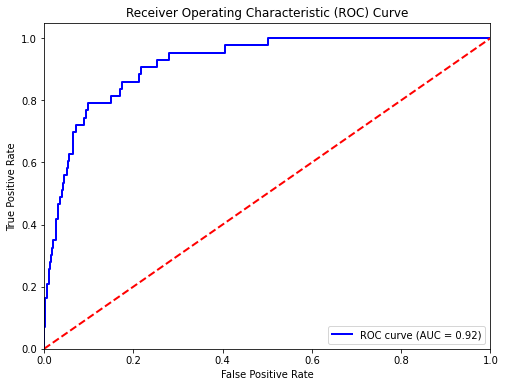

In [46]:
# Wybieramy najlepszą wartość alpha dla naszych danych
lasso_model_pred = lasso_model.predict(df_x)
calculate_metrics(df_y, lasso_model_pred)

This model looks very promising, lets compare all of them at once.

ROC AUC score: 0.5450717430977614


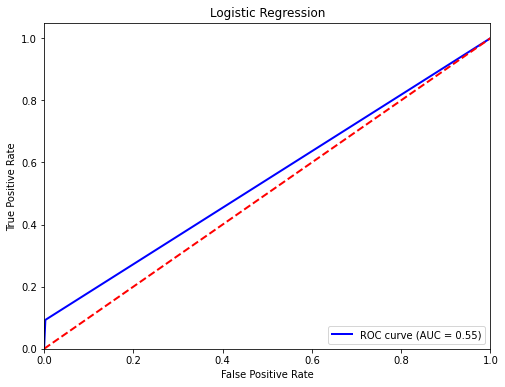

ROC AUC score: 0.833902590118372


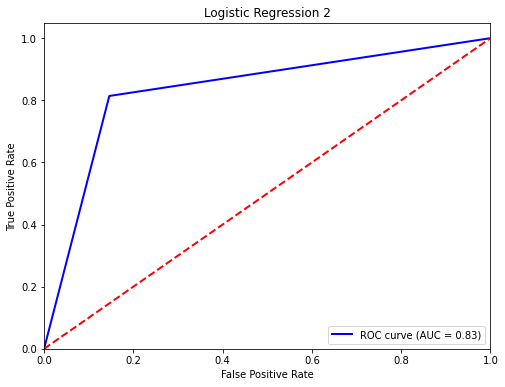

ROC AUC score: 0.699189646223651


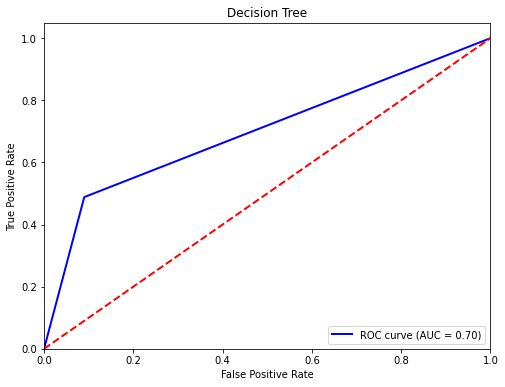

ROC AUC score: 0.5447117718954576


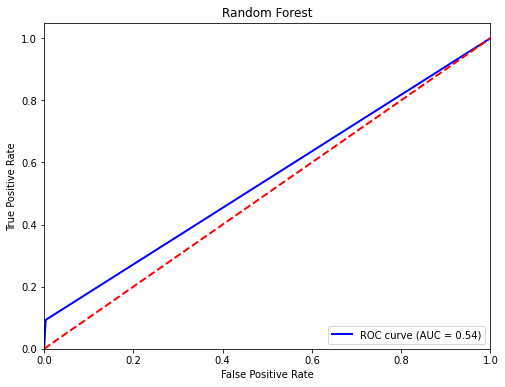

ROC AUC score: 0.9188641652853817


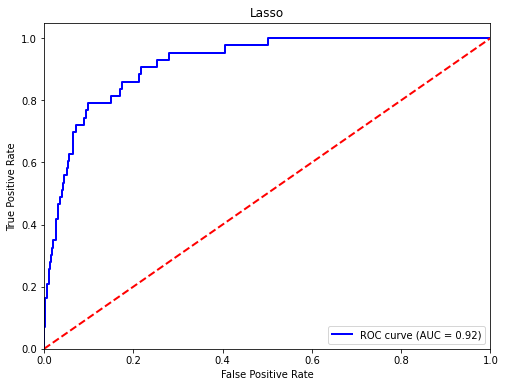

In [47]:
models = {
    'Logistic Regression': lr_model_pred,
    'Logistic Regression 2': lr2_model_pred,
    'Decision Tree': DT_model_pred,
    'Random Forest': RF_model_pred,
    'Lasso': lasso_model_pred
}

for name, model_pred in models.items():
    calculate_metrics(df_y, model_pred, title=name)

Now we can clearly see, that the Lasso model performs the best, with an ROC of 0.92

Having built the model, we can now save it.

## Saving the model

In [48]:
import joblib

file_path = "lasso_model.pkl"

joblib.dump(lasso_model, file_path)

print("The saved model can be found here:", file_path)

The saved model can be found here: lasso_model.pkl
